In [2]:
import pandas as pd
from sklearn import linear_model 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
df = pd.read_csv('Shimla Final week wise.csv')
df.head()

,Week,Season,Air Travel,Hotel and Acc,Rail Travel,Shopping,Covid 19,Travel Guides & Travelogues,Car Rental & Taxi Services,Tourist Destinations,Image Search,W1,W2,W3,Weekwise Tourists
0,03-01-2010,1,0,33,16,36,0,59,0,51,57,-0.90775,0.529753,0.258209,38909.16
1,10-01-2010,1,0,34,39,0,0,29,0,68,63,-0.50422,0.462215,0.100223,38909.16
2,17-01-2010,1,0,28,0,0,0,16,0,60,64,-0.46471,-0.395820,0.631128,38909.16
3,24-01-2010,1,0,0,0,0,0,25,0,47,36,-0.90775,0.529753,0.258209,38909.16
4,31-01-2010,1,47,42,21,0,0,0,0,38,39,-0.41561,0.431946,0.639136,40242.74


In [4]:
y_df = df['Weekwise Tourists']
df = df.drop(columns=['Week','Weekwise Tourists'])

In [5]:
import seaborn as sns 

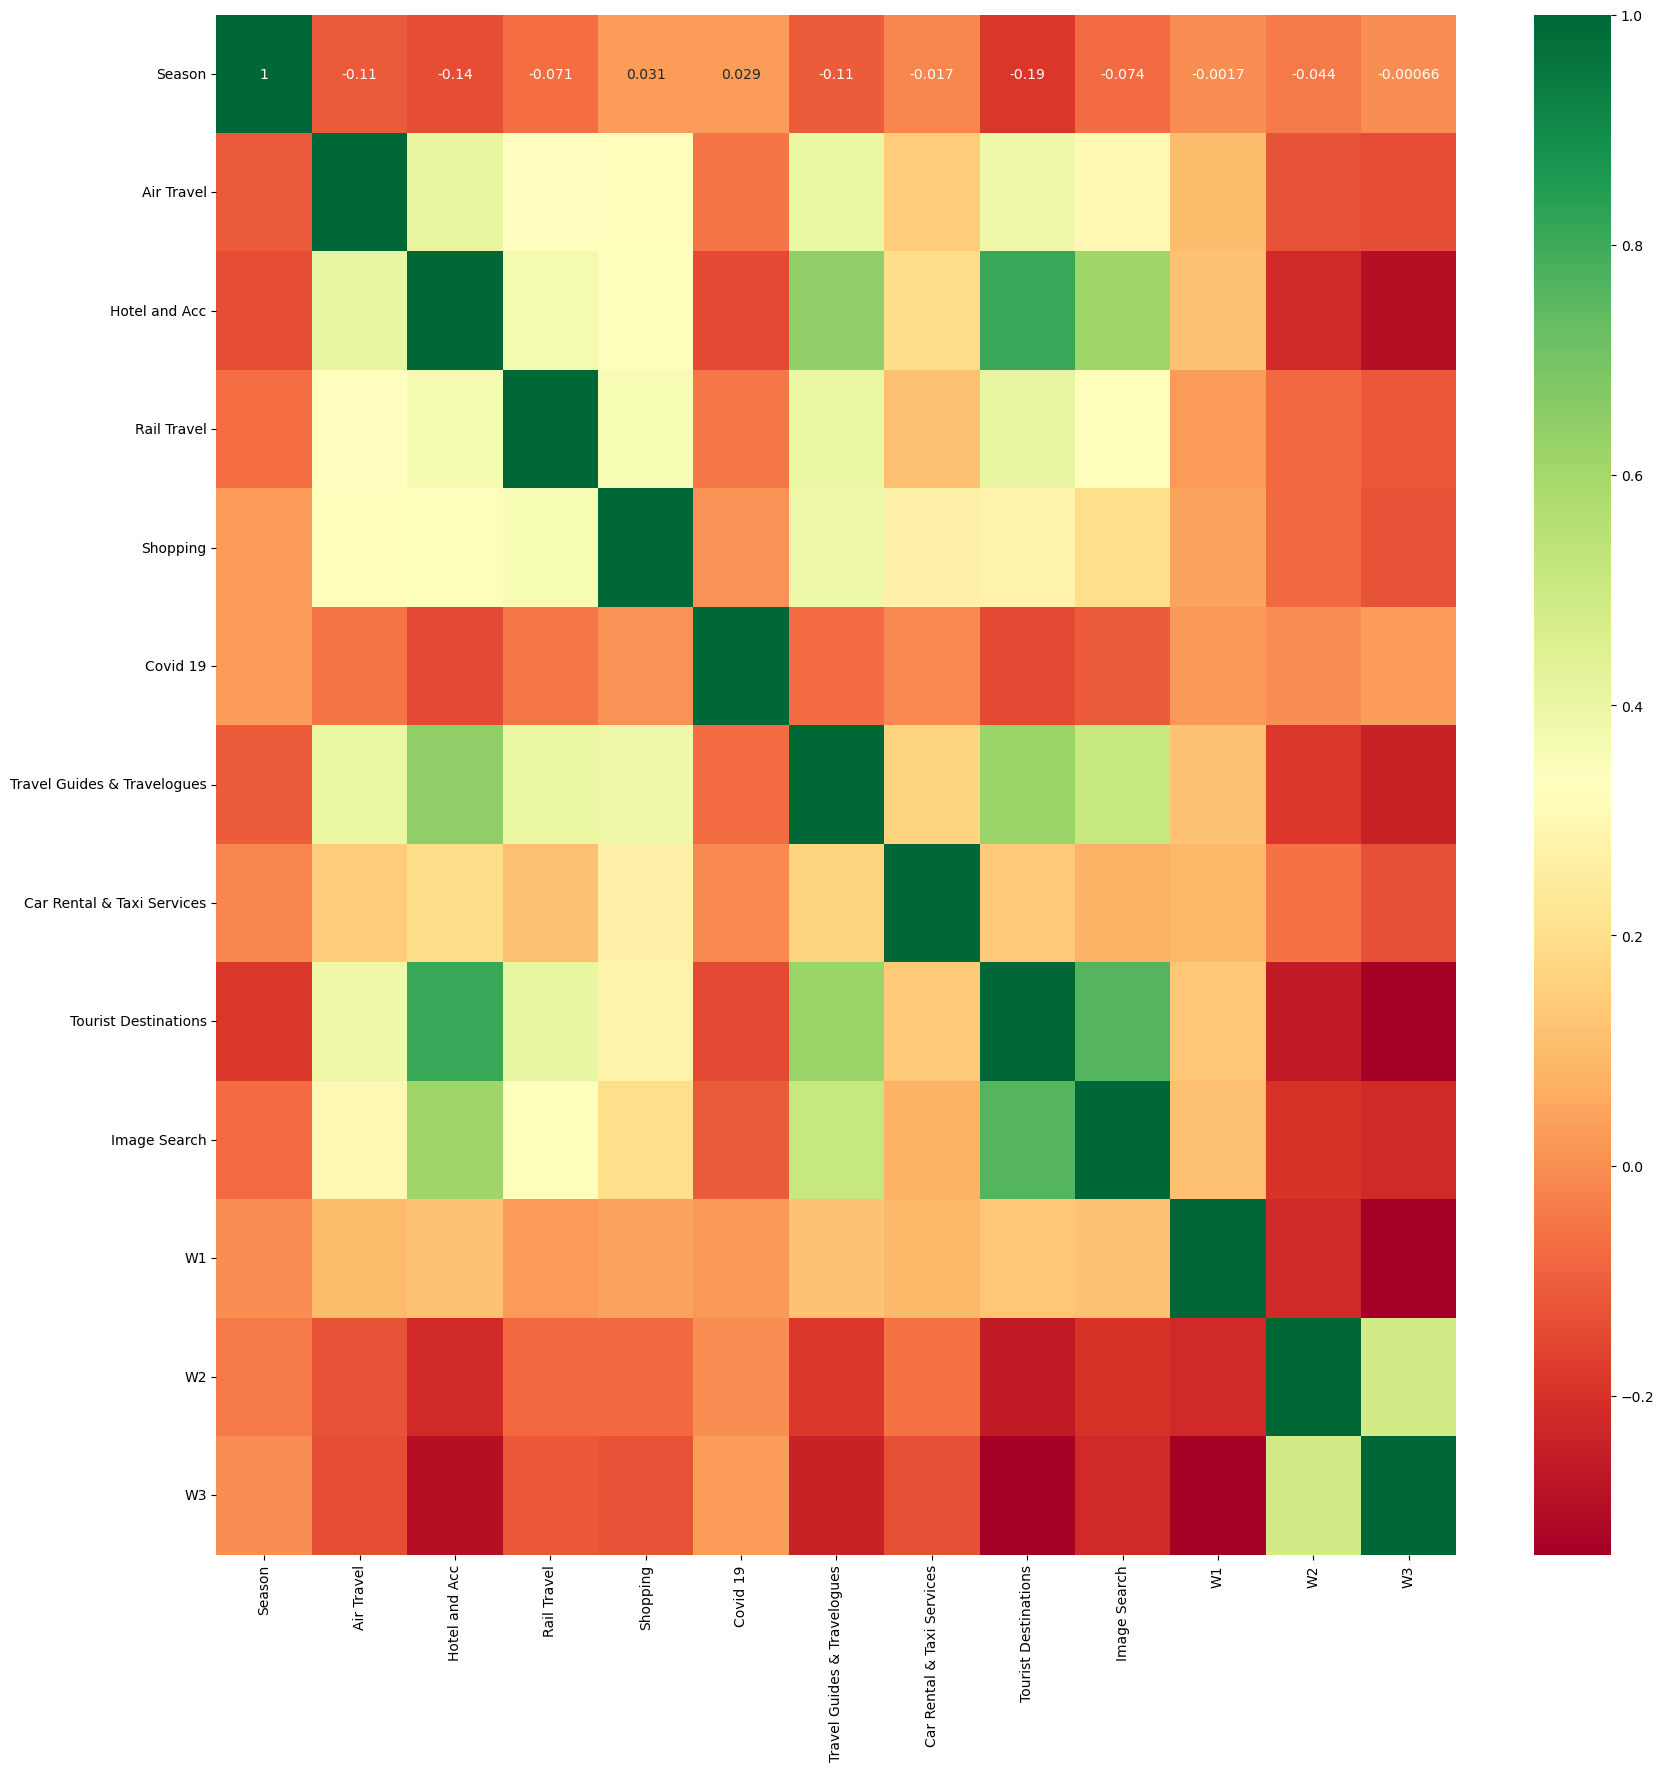

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 0, 'W3')

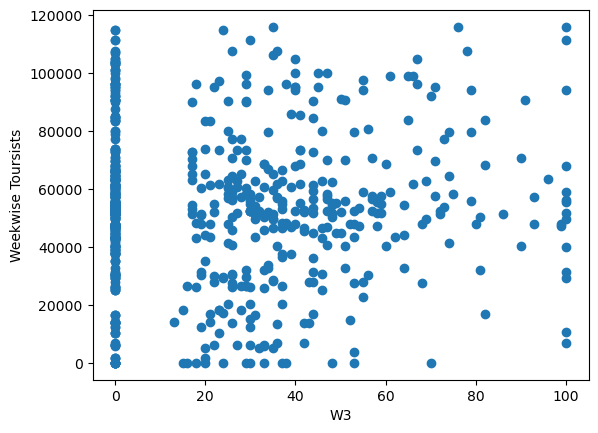

In [7]:
plt.scatter(df['Car Rental & Taxi Services'],y_df)
plt.ylabel('Weekwise Toursists')
plt.xlabel('W3')

In [8]:
reg = linear_model.LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['Season','Air Travel','Hotel and Acc','Rail Travel','Shopping','Covid 19','Travel Guides & Travelogues','Car Rental & Taxi Services','Tourist Destinations','Image Search','W1','W2','W3']],y_df,test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
reg.fit(X_train_scaled,Y_train)

LinearRegression()

In [14]:
reg.score(X_test_scaled,Y_test)

0.2992120818893791

In [15]:
from sklearn import tree 
tree_model = tree.DecisionTreeRegressor()

In [16]:
tree_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [17]:
tree_model.score(X_test,Y_test)

0.4802473245763855

In [18]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()

In [19]:
random_model.fit(X_train,Y_train)
random_model.score(X_test,Y_test)

0.7183465366580855

In [71]:
param_dist = {
    'learning_rate':[0.15,0.2,0.25,0.1],
    'gamma':[0.0,0.1,0.2,0.3,0.15,0.25],
    'base_score':[0.25,0.5,0.75],
    'n_estimators':[25,50,75,100]
}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()

In [74]:
random_cv = RandomizedSearchCV(xgb_regressor,param_distributions= param_dist,n_iter=10,cv=5)

In [75]:
random_cv.fit(df,y_df)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'base_score': [0.25, 0.5, 0.75],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.15,
                                                  0.25],
                                        'learning_rate': [0.15, 0.2, 0.25, 0.1],
                                        'n_estimators': [25, 50, 75, 100]})

In [76]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
random_cv.best_params_

{'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 0.0, 'base_score': 0.5}

In [78]:
regeressor = XGBRegressor(learning_rate = 0.1, gamma=0.0,base_score=0.5,n_estimators=100)

In [79]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regeressor,df,y_df,cv=6)
score.mean()

0.3924576508134765